In [95]:
#!pip install statsmodels
#!pip install distfit
%matplotlib inline
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import seaborn as sns
import statsmodels.api as sm
import scipy
import scipy.stats as st
from distfit import distfit

In [96]:
books = pd.read_csv("./Resources/Books.csv")
books

,Unnamed: 0,Title,Author,Rating Count,Review Count,Rating Value,N pag,1st Pub,series,Genres,Awards,minmax_norm_ratings,mean_norm_ratings,Link
0,0,To Kill a Mockingbird,Harper Lee,4629082,92962,4.28,324.0,1960.0,1,"['Classics', 'Fiction', 'Historical']",4.0,7.705,7.448889,https://www.goodreads.com/book/show/2657.To_Ki...
1,1,1984,George Orwell,3250211,72375,4.19,237.0,1949.0,0,"['Classics', 'Fiction', 'Science Fiction']",2.0,7.161,6.845556,https://www.goodreads.com/book/show/40961427-1984
2,2,The Great Gatsby,F. Scott Fitzgerald,3877685,68965,3.93,200.0,1925.0,0,"['Classics', 'Fiction', 'Academic']",1.0,5.591,5.100000,https://www.goodreads.com/book/show/3.Harry_Po...
3,3,Harry Potter and the Sorcerer's Stone,J.K. Rowling,7281482,115354,4.48,309.0,1997.0,1,"['Fantasy', 'Fiction', 'Young Adult']",28.0,8.913,8.791111,https://www.goodreads.com/book/show/4671.The_G...
4,4,"The Hobbit, or There and Back Again",J.R.R. Tolkien,2973224,49547,4.28,366.0,1937.0,1,"['Fantasy', 'Classics', 'Fiction']",3.0,7.705,7.448889,https://www.goodreads.com/book/show/170448.Ani...
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
991,991,The Snows of Kilimanjaro and Other Stories,Ernest Hemingway,33823,1453,3.87,144.0,1961.0,0,"['Fiction', 'Short Stories', 'Classics']",NaN,5.228,4.697778,https://www.goodreads.com/book/show/244261.The...
992,992,The Street of Crocodiles,Bruno Schulz,7034,599,4.13,160.0,1933.0,0,"['Fiction', 'Short Stories', 'European Literat...",2.0,6.799,6.442222,https://www.goodreads.com/book/show/4645.The_S...
993,993,Riddley Walker,Russell Hoban,7075,819,4.02,256.0,1980.0,0,"['Fiction', 'Science Fiction', 'Apocalyptic']",3.0,6.134,5.704444,https://www.goodreads.com/book/show/428.Play_I...
994,994,Play It As It Lays,Joan Didion,29879,2278,3.88,231.0,1970.0,0,"['Fiction', 'Classics', 'Novels']",NaN,5.289,4.764444,https://www.goodreads.com/book/show/776573.Rid...


In [110]:
data = books["minmax_norm_ratings"]

[distfit] >fit..
[distfit] >transform..
[smoothline] >Smoothing by interpolation..
[distfit] >[norm      ] [RSS: 0.0153135] [loc=6.374 scale=1.235] 
[distfit] >[expon     ] [RSS: 0.8881359] [loc=1.000 scale=5.374] 
[distfit] >[pareto    ] [RSS: 0.8944523] [loc=-93583774.901 scale=93583775.901] 
[distfit] >[dweibull  ] [RSS: 0.0395142] [loc=6.337 scale=1.071] 
[distfit] >[t         ] [RSS: 0.0168758] [loc=6.379 scale=1.212] 
[distfit] >[genextreme] [RSS: 0.0078507] [loc=5.946 scale=1.272] 
[distfit] >[gamma     ] [RSS: 0.0189123] [loc=-18.226 scale=0.064] 
[distfit] >[lognorm   ] [RSS: 0.0165452] [loc=-223.208 scale=229.578] 
[distfit] >[beta      ] [RSS: 0.0087586] [loc=-1659042.296 scale=1659057.588] 
[distfit] >[uniform   ] [RSS: 0.5525509] [loc=1.000 scale=9.000] 
[distfit] >Compute confidence interval [parametric]
{'distr': <scipy.stats._continuous_distns.genextreme_gen object at 0x7f7cbd6dbf50>, 'params': (0.30149612336799425, 5.945537091928044, 1.2720670859342675), 'name': 'genex

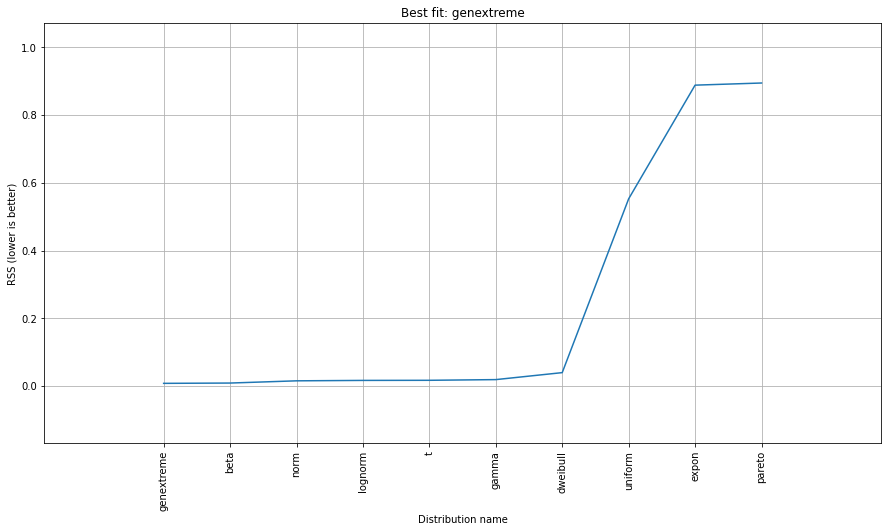

(<Figure size 1080x576 with 1 Axes>,
 <AxesSubplot:title={'center':'Best fit: genextreme'}, xlabel='Distribution name', ylabel='RSS (lower is better)'>)

In [112]:
X = data
y = [0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10]

dist = distfit(alpha=0.05, smooth=10)

# Search for best theoretical fit on your empirical data
dist.fit_transform(data)



# Best fitted model
best_distr = dist.model
print(best_distr)


# Ranking distributions
dist.summary

# Plot the summary of fitted distributions
dist.plot_summary()

[distfit] >predict..
[distfit] >Multiple test correction..[fdr_bh]
[distfit] >plot..


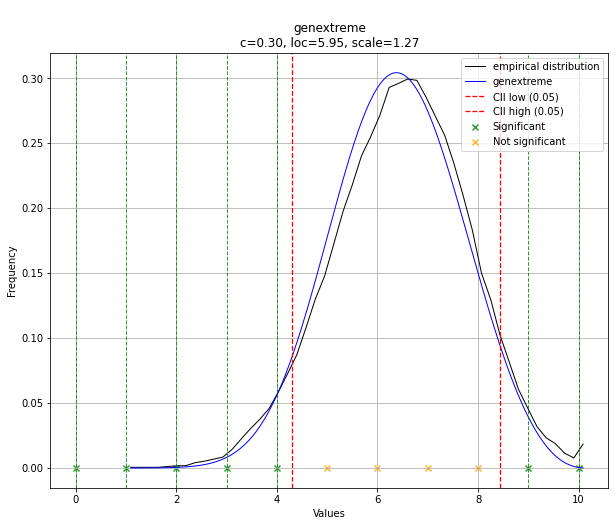

<Figure size 432x288 with 0 Axes>

In [113]:
# Make prediction on new datapoints based on the fit
dist.predict(y)

# Retrieve your pvalues with 
dist.y_pred
# array(['down', 'none', 'none', 'up', 'up'], dtype='<U4')
dist.y_proba
np.array([0.02040816, 0.02040816, 0.02040816, 0.        , 0.        ])

# Or in one dataframe
dist.df

# The plot function will now also include the predictions of y
dist.plot()

plt.savefig('bestfit_minmax_norm.jpg')

In [114]:
data2 = books["mean_norm_ratings"]

[distfit] >fit..
[distfit] >transform..
[smoothline] >Smoothing by interpolation..
[distfit] >[norm      ] [RSS: 0.0124284] [loc=5.971 scale=1.372] 
[distfit] >[expon     ] [RSS: 0.7194103] [loc=0.000 scale=5.971] 
[distfit] >[pareto    ] [RSS: 1.1554864] [loc=-1.542 scale=1.542] 
[distfit] >[dweibull  ] [RSS: 0.0408222] [loc=5.874 scale=1.200] 
[distfit] >[t         ] [RSS: 0.0136957] [loc=5.977 scale=1.346] 
[distfit] >[genextreme] [RSS: 0.0063758] [loc=5.495 scale=1.413] 
[distfit] >[gamma     ] [RSS: 0.0158329] [loc=-21.670 scale=0.069] 
[distfit] >[lognorm   ] [RSS: 0.0132085] [loc=-206.532 scale=212.502] 
[distfit] >[beta      ] [RSS: 0.0071410] [loc=-1845189.265 scale=1845205.133] 
[distfit] >[uniform   ] [RSS: 0.4475663] [loc=0.000 scale=10.000] 
[distfit] >Compute confidence interval [parametric]
{'distr': <scipy.stats._continuous_distns.genextreme_gen object at 0x7f7cbd6dbf50>, 'params': (0.30149573318285855, 5.49473673970186, 1.413442350186814), 'name': 'genextreme', 'RSS': 

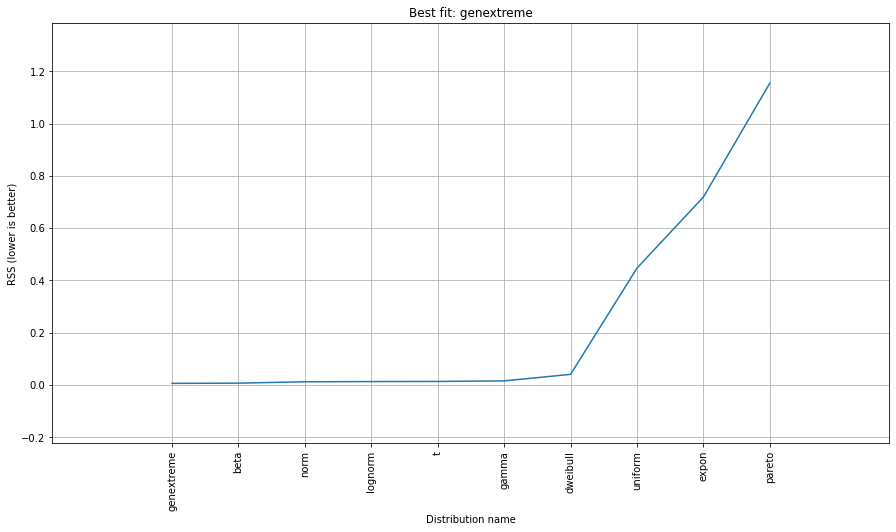

(<Figure size 1080x576 with 1 Axes>,
 <AxesSubplot:title={'center':'Best fit: genextreme'}, xlabel='Distribution name', ylabel='RSS (lower is better)'>)

In [115]:
X = data2

# Retrieve P-value for y
y = [0,1,2,3,4,5,6,7,8,9,10]


# Initialize.
# Set any properties here, such as alpha.
# The smoothing can be of use when working with integers. Otherwise your histogram
# may be jumping up-and-down, and getting the correct fit may be harder.
dist = distfit(alpha=0.05, smooth=10)

# Search for best theoretical fit on your empirical data
dist.fit_transform(X)

# Best fitted model
best_distr = dist.model
print(best_distr)


# Ranking distributions
dist.summary

# Plot the summary of fitted distributions
dist.plot_summary()

[distfit] >predict..
[distfit] >Multiple test correction..[fdr_bh]
[distfit] >plot..


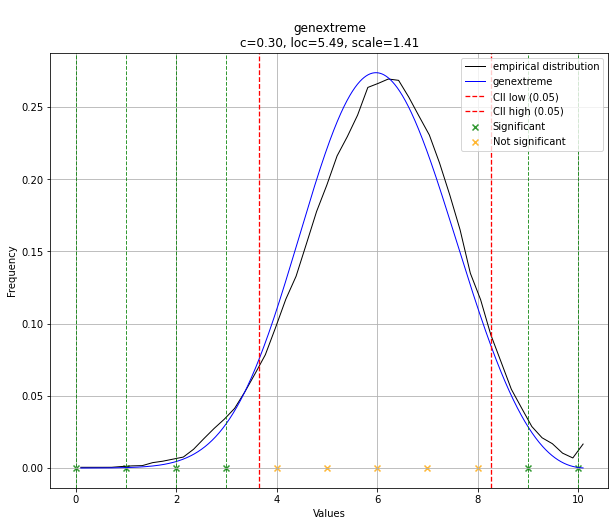

<Figure size 432x288 with 0 Axes>

In [116]:
# Make prediction on new datapoints based on the fit
dist.predict(y)

# Retrieve your pvalues with 
dist.y_pred
# array(['down', 'none', 'none', 'up', 'up'], dtype='<U4')
dist.y_proba
np.array([0.02040816, 0.02040816, 0.02040816, 0.        , 0.        ])

# Or in one dataframe
dist.df

# The plot function will now also include the predictions of y
dist.plot()


plt.savefig('bestfit_mean_norm.jpg')

In [117]:
data3 = books["Rating Value"]

[distfit] >fit..
[distfit] >transform..
[smoothline] >Smoothing by interpolation..
[distfit] >[norm      ] [RSS: 0.5587076] [loc=4.060 scale=0.204] 
[distfit] >[expon     ] [RSS: 32.4035105] [loc=3.170 scale=0.890] 
[distfit] >[pareto    ] [RSS: 35.5821207] [loc=-0.007 scale=3.177] 
[distfit] >[dweibull  ] [RSS: 1.0808578] [loc=4.074 scale=0.176] 
[distfit] >[t         ] [RSS: 0.6156876] [loc=4.061 scale=0.201] 
[distfit] >[genextreme] [RSS: 0.2865178] [loc=3.989 scale=0.211] 
[distfit] >[gamma     ] [RSS: 0.6858641] [loc=-0.003 scale=0.011] 
[distfit] >[lognorm   ] [RSS: 0.6014328] [loc=-49.194 scale=53.253] 
[distfit] >[beta      ] [RSS: 0.3204199] [loc=-274692.100 scale=274697.635] 
[distfit] >[uniform   ] [RSS: 20.1597346] [loc=3.170 scale=1.490] 
[distfit] >Compute confidence interval [parametric]
{'distr': <scipy.stats._continuous_distns.genextreme_gen object at 0x7f7cbd6dbf50>, 'params': (0.3014889288523249, 3.988772758021647, 0.21057999487067902), 'name': 'genextreme', 'RSS': 0

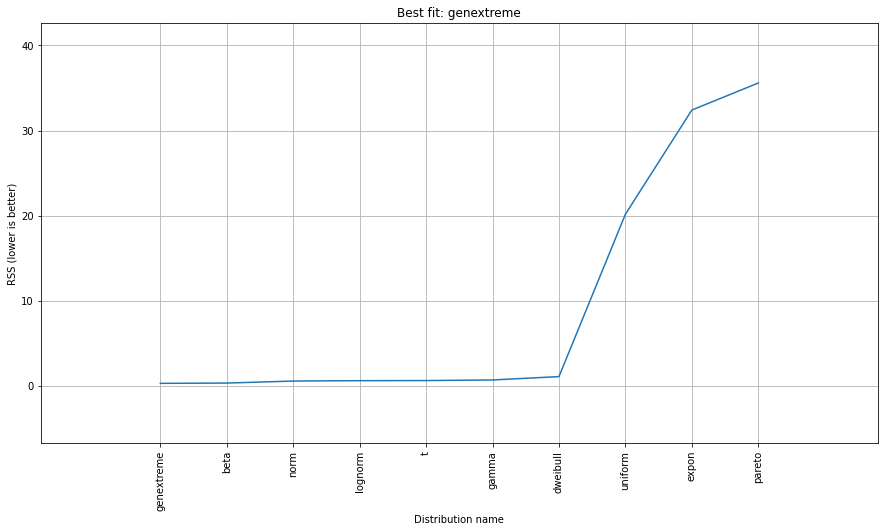

(<Figure size 1080x576 with 1 Axes>,
 <AxesSubplot:title={'center':'Best fit: genextreme'}, xlabel='Distribution name', ylabel='RSS (lower is better)'>)

In [118]:
X = data3

# Retrieve P-value for y
y = [0,1,2,3,4,5,6,7,8,9,10]


# Initialize.
# Set any properties here, such as alpha.
# The smoothing can be of use when working with integers. Otherwise your histogram
# may be jumping up-and-down, and getting the correct fit may be harder.
dist = distfit(alpha=0.05, smooth=10)

# Search for best theoretical fit on your empirical data
dist.fit_transform(X)

# Best fitted model
best_distr = dist.model
print(best_distr)

# Ranking distributions
dist.summary

# Plot the summary of fitted distributions
dist.plot_summary()

[distfit] >predict..
[distfit] >Multiple test correction..[fdr_bh]
[distfit] >plot..


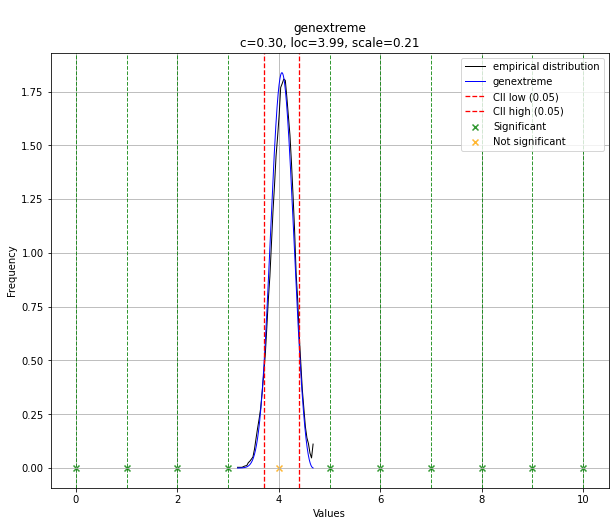

<Figure size 432x288 with 0 Axes>

In [119]:
# Make prediction on new datapoints based on the fit
dist.predict(y)

# Retrieve your pvalues with 
dist.y_pred
# array(['down', 'none', 'none', 'up', 'up'], dtype='<U4')
dist.y_proba
np.array([0.09090909090909091,0.09090909090909091,0.09090909090909091,0.09090909090909091,0.09090909090909091,0.09090909090909091,0.09090909090909091,0.09090909090909091,0.09090909090909091,0.09090909090909091])

# Or in one dataframe
dist.df

# The plot function will now also include the predictions of y
dist.plot()


plt.savefig('bestfit_ratings.jpg')